# Importing Data in Python 1

## 1. Import flat files

In [ ]:
# Importing text file

In [ ]:
file = open('moby_dick.txt', mode='r')

print(file.read())

file.close()

In [ ]:
# Importing large text files line by line

In [ ]:
with open('moby_dick.txt') as file:    # context manager
    print(file.readline())
    print(file.readline())
    print(file.readline())

### Numpy array 를 이용해 파일 읽기

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
file = 'data/mnist_test.csv'

In [10]:
digits = np.loadtxt(file, delimiter=',')   # Load file as array
digits

array([[ 7.,  0.,  0., ...,  0.,  0.,  0.],
       [ 2.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 4.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  0.,  0., ...,  0.,  0.,  0.],
       [ 6.,  0.,  0., ...,  0.,  0.,  0.]])

In [11]:
digits.shape

(10000, 785)

In [5]:
print(type(digits))

<class 'numpy.ndarray'>


In [42]:
# reshape a row
im = digits[12, 1:]
im_sq = np.reshape(im, (28, 28))   # 28 * 28 format (=784)

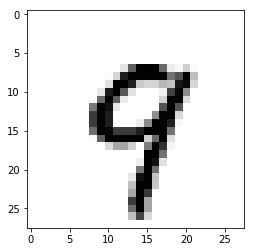

In [43]:
# Plot reshaped data
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

In [ ]:
# 몇 가지 옵션들...

In [ ]:
data = np.loadtxt(file, delimiter='\t', dtype=str)   # 탭 구분, 문자열

data_float = np.loadtxt(file, delimiter='\t', dtype='float', skiprows=1)   # 탭 구분, 데이터 타입, 1번째 줄 제외

### pandas 를 이용해 파일 읽기

In [ ]:
data = pd.read_csv(file, sep='\t', comment='#', na_values=['Nothing'])   # 탭 구분, 주석 표시, NA 치환.

data = pd.read_csv(file, header=None, nrows=5)   # 헤더 없음. 첫 5줄만 읽기.

## 2. Importing sheets of Excel

In [44]:
import pandas as pd

In [45]:
file = 'data/pop_growth.xlsx'

In [46]:
xl = pd.ExcelFile(file)
xl.sheet_names

['before2000', 'after2000']

In [47]:
df1 = xl.parse('before2000')   # = xl.parse(0)
df1.head()

,pop,year
0,2.53,1950
1,2.57,1951
2,2.62,1952
3,2.67,1953
4,2.71,1954


In [48]:
df2 = xl.parse(1)
df2.head()

,population,year
0,6.13,2000
1,6.20,2001
2,6.28,2002
3,6.36,2003
4,6.44,2004


In [49]:
# 1 라인 무시, 컬럼명 지정.
df1 = xl.parse(0, skiprows=1, names=['인구','년도'])
df1.head()

,인구,년도
0,2.57,1951
1,2.62,1952
2,2.67,1953
3,2.71,1954
4,2.76,1955


In [51]:
# 2번째 시트의 1번째 컬럼만.
df2 = xl.parse(1, parse_cols=0, skiprows=1, names=['pop3'])
df2.head()

,pop3
0,6.20
1,6.28
2,6.36
3,6.44
4,6.51


## 3. 관계형 DB에서 데이터 가져오기

#### Link

In [ ]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine
engine = create_engine('sqlite:///mydb.sqlite')

# table names
table_names = engine.table_names()

#### SQL Queries

In [ ]:
# Open engine connection
con = engine.connect()

# Perform query
rs = con.execute("SELECT * FROM Album")

df = pd.DataFrame(rs.fetchall())   # save result to DataFrame

con.close()

In [ ]:
# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("SELECT LastName, Title FROM Employee")
    df = pd.DataFrame(rs.fetchmany(size=3))  # first 3 rows
    df.columns = rs.keys()   # Set the DataFrame's column names

print(len(df))
print(df.head())

#### Querying RDB directly with pandas

In [ ]:
df = pd.read_sql_query("SELECT * FROM Album", engine)

In [ ]:
df = pd.read_sql_query("SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate", engine)

In [ ]:
# pd.read_sql_query("JOIN문 사용 가능", engine)